In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

BASE_DIR = '/home/mgraca/Workspace/hrrr-smoke-viz'
CACHE_DIR = f'{BASE_DIR}/pwwb-experiments/tensorflow/cached_data/two_years_sat_data'
AIRNOW_CACHE_PATH = f'{CACHE_DIR}/airnow_cache/airnow_processed.npz'
AOD_CACHE_PATH = f'{CACHE_DIR}/goes_cache/goes_processed.npz'
NO2_CACHE_PATH = f'{CACHE_DIR}/tempo_cache/tempo_l3_no2_20230802_20250802_hourly.npz'

sys.path.append(BASE_DIR)

dates_of_interest = {
    'Independence Day 2024' : pd.to_datetime("2024-07-04").tz_localize('America/Los_Angeles'),
    'Independence Day 2025' : pd.to_datetime("2025-07-04").tz_localize('America/Los_Angeles'),
    'Palisades/Eaton Fire' : pd.to_datetime("2025-01-10").tz_localize('America/Los_Angeles'),
}
dates_of_interest['Independence Day 2025']

Timestamp('2025-07-04 00:00:00-0700', tz='America/Los_Angeles')

In [2]:
START_DATE = "2023-08-02-00"
END_DATE = "2025-08-02-00"

dates = pd.date_range(START_DATE, END_DATE, inclusive='left', freq='h', tz='utc').tz_convert('America/Los_Angeles')
dates

DatetimeIndex(['2023-08-01 17:00:00-07:00', '2023-08-01 18:00:00-07:00',
               '2023-08-01 19:00:00-07:00', '2023-08-01 20:00:00-07:00',
               '2023-08-01 21:00:00-07:00', '2023-08-01 22:00:00-07:00',
               '2023-08-01 23:00:00-07:00', '2023-08-02 00:00:00-07:00',
               '2023-08-02 01:00:00-07:00', '2023-08-02 02:00:00-07:00',
               ...
               '2025-08-01 07:00:00-07:00', '2025-08-01 08:00:00-07:00',
               '2025-08-01 09:00:00-07:00', '2025-08-01 10:00:00-07:00',
               '2025-08-01 11:00:00-07:00', '2025-08-01 12:00:00-07:00',
               '2025-08-01 13:00:00-07:00', '2025-08-01 14:00:00-07:00',
               '2025-08-01 15:00:00-07:00', '2025-08-01 16:00:00-07:00'],
              dtype='datetime64[ns, America/Los_Angeles]', length=17544, freq='h')

In [3]:
sensor_locations = {
    'Simi Valley - Cochran Street': (8, 1),
    'Reseda': (12, 4),
    'Santa Clarita': (4, 5),
    'North Holywood': (12, 8),
    'Los Angeles - N. Main Street': (17, 11),
    'Compton': (23, 12),
    'Long Beach Signal Hill': (28, 13),
    'Anaheim': (26, 18),
    'Glendora - Laurel': (14, 20),
    'Mira Loma - Van Buren': (20, 28),
    'Riverside - Rubidoux': (20, 30),
    'Lake Elsinore - W. Flint Street': (32, 32),
    'Crestline - Lake Gregory': (10, 33),
    'Temecula (Lake Skinner)': (36, 38),
    'Fontana - Arrow Highway': (15, 28)
}

sensor_x_vals, sensor_y_vals = [], []
for x, y in sensor_locations.values():
    sensor_x_vals.append(x)
    sensor_y_vals.append(y)

In [4]:
import json

AIRNOW_JSON_PATH = f'{CACHE_DIR}/airnow_cache/airnow.json'
data = pd.read_json(AIRNOW_JSON_PATH)
original_data = data.copy()
data

,Latitude,Longitude,UTC,Parameter,Unit,Value,RawConcentration,AQI,Category,SiteName,AgencyName,FullAQSCode,IntlAQSCode
0,34.276320,-118.683690,2023-08-02T00:00,PM2.5,UG/M3,9.8,8.0,52,2,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
1,34.199200,-118.533100,2023-08-02T00:00,PM2.5,UG/M3,9.9,10.2,52,2,Reseda,South Coast AQMD,060371201,840060371201
2,34.383300,-118.528300,2023-08-02T00:00,PM2.5,UG/M3,9.6,9.9,52,2,Santa Clarita,South Coast AQMD,060376012,840060376012
3,34.181977,-118.363036,2023-08-02T00:00,PM2.5,UG/M3,10.5,10.8,54,2,North Holywood,South Coast AQMD,840060374010,840060374010
4,34.066429,-118.226755,2023-08-02T00:00,PM2.5,UG/M3,17.8,16.4,67,2,Los Angeles - N. Main Street,South Coast AQMD,060371103,840060371103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256565,34.100132,-117.491982,2025-08-01T23:00,PM2.5,UG/M3,13.3,10.3,59,2,Fontana - Arrow Highway,South Coast AQMD,060712002,840060712002
256566,33.999449,-117.415831,2025-08-01T23:00,PM2.5,UG/M3,12.8,11.2,58,2,Riverside - Rubidoux,South Coast AQMD,060658001,840060658001
256567,33.676535,-117.331027,2025-08-01T23:00,PM2.5,UG/M3,9.6,9.5,52,2,Lake Elsinore - W. Flint Street,South Coast AQMD,060659001,840060659001
256568,34.243132,-117.272275,2025-08-01T23:00,PM2.5,UG/M3,7.4,6.9,41,1,Crestline - Lake Gregory,South Coast AQMD,060710005,840060710005


In [5]:
# minimal cleaning: remove negative values
data.loc[data['Value'] < 0, 'Value'] = 0
data.loc[data['RawConcentration'] < 0, 'RawConcentration'] = 0

In [6]:
pm25 = np.load(AIRNOW_CACHE_PATH)['data'][:, sensor_x_vals, sensor_y_vals]
mean_processed = np.mean(pm25, axis=(1))

mean_raw_con = data.groupby('UTC')['RawConcentration'].mean()
mean_nowcast = data.groupby('UTC')['Value'].mean()

combined_df = pd.DataFrame({
    'date (pst)' : dates,
    'nowcast pm2.5' : mean_nowcast,
    'rawcon pm2.5' : mean_raw_con,
    'processed pm2.5' : mean_processed,
})

combined_df

,date (pst),nowcast pm2.5,rawcon pm2.5,processed pm2.5
UTC,,,,
2023-08-02T00:00,2023-08-01 17:00:00-07:00,11.726667,11.560000,11.726666
2023-08-02T01:00,2023-08-01 18:00:00-07:00,11.820000,11.980000,11.820001
2023-08-02T02:00,2023-08-01 19:00:00-07:00,11.860000,11.920000,11.860001
2023-08-02T03:00,2023-08-01 20:00:00-07:00,11.380000,10.960000,11.380001
2023-08-02T04:00,2023-08-01 21:00:00-07:00,11.906667,12.400000,11.906668
...,...,...,...,...
2025-08-01T19:00,2025-08-01 12:00:00-07:00,13.078571,12.635714,13.017777
2025-08-01T20:00,2025-08-01 13:00:00-07:00,12.692857,12.321429,12.708889
2025-08-01T21:00,2025-08-01 14:00:00-07:00,11.792857,10.957143,11.771110


# JSON processing

1. Remove all sensors that report < 25% of the time
2. Replace all sensors reporting < 0 PM2.5 with NaN
3. Fill all non-reporting sensors with NaN Value, RawConcentration, AQI, and Category
4. Do something to the nans

## remove sensors < 25% reporting, and replace sensors reporting < 0 with NaN

In [7]:
timesteps = len(original_data.groupby('UTC').count())

In [8]:
filtered_data = original_data.groupby('FullAQSCode').filter(lambda x : len(x) / timesteps > 0.25).copy()
filtered_data.loc[filtered_data['Value'] < 0, 'Value'] = np.nan
filtered_data[filtered_data['Value'].isnull()]

,Latitude,Longitude,UTC,Parameter,Unit,Value,RawConcentration,AQI,Category,SiteName,AgencyName,FullAQSCode,IntlAQSCode
264,33.999449,-117.415831,2023-08-02T17:00,PM2.5,UG/M3,NaN,15.5,-999,-999,Riverside - Rubidoux,South Coast AQMD,060658001,840060658001
349,34.143900,-117.850800,2023-08-02T23:00,PM2.5,UG/M3,NaN,18.2,-999,-999,Glendora - Laurel,South Coast AQMD,060370016,840060370016
1007,33.676535,-117.331027,2023-08-04T19:00,PM2.5,UG/M3,NaN,27.7,-999,-999,Lake Elsinore - W. Flint Street,South Coast AQMD,060659001,840060659001
1016,33.793713,-118.171019,2023-08-04T20:00,PM2.5,UG/M3,NaN,8.1,-999,-999,Long Beach Signal Hill,South Coast AQMD,840060374009,840060374009
1109,33.583099,-117.072197,2023-08-05T02:00,PM2.5,UG/M3,NaN,12.8,-999,-999,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251525,34.066429,-118.226755,2025-07-18T19:00,PM2.5,UG/M3,NaN,2.5,-999,-999,Los Angeles - N. Main Street,South Coast AQMD,060371103,840060371103
253310,33.901400,-118.205000,2025-07-23T18:00,PM2.5,UG/M3,NaN,11.4,-999,-999,Compton,South Coast AQMD,060371302,840060371302
255515,33.999449,-117.415831,2025-07-29T23:00,PM2.5,UG/M3,NaN,10.9,-999,-999,Riverside - Rubidoux,South Coast AQMD,060658001,840060658001
255785,34.276320,-118.683690,2025-07-30T19:00,PM2.5,UG/M3,NaN,10.0,-999,-999,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002


## fill all non reporters with nan

In [9]:
filtered_data.groupby('UTC').size().sort_values()

UTC
2024-05-10T20:00    10
2024-05-10T18:00    11
2025-01-22T19:00    11
2024-05-10T19:00    11
2025-01-22T20:00    11
                    ..
2023-08-03T19:00    15
2023-08-02T03:00    15
2023-08-02T02:00    15
2023-08-02T01:00    15
2023-08-02T00:00    15
Length: 17544, dtype: int64

In [10]:
filtered_data.groupby(['FullAQSCode', 'SiteName'])['UTC'].size()

FullAQSCode   SiteName                       
060370016     Glendora - Laurel                  16675
060371103     Los Angeles - N. Main Street       17083
060371201     Reseda                             16928
060371302     Compton                            16834
060376012     Santa Clarita                      17190
060590007     Anaheim                            16946
060650016     Temecula (Lake Skinner)            17190
060658001     Riverside - Rubidoux               17243
060658005     Mira Loma - Van Buren              17154
060659001     Lake Elsinore - W. Flint Street    17117
060710005     Crestline - Lake Gregory           17084
060712002     Fontana - Arrow Highway            16573
061112002     Simi Valley - Cochran Street       17329
840060374009  Long Beach Signal Hill             16837
840060374010  North Holywood                     17262
Name: UTC, dtype: int64

In [11]:
dates_df = pd.DataFrame({'UTC': pd.date_range(START_DATE, END_DATE, inclusive='left', freq='h')})
dates_df

,UTC
0,2023-08-02 00:00:00
1,2023-08-02 01:00:00
2,2023-08-02 02:00:00
3,2023-08-02 03:00:00
4,2023-08-02 04:00:00
...,...
17539,2025-08-01 19:00:00
17540,2025-08-01 20:00:00
17541,2025-08-01 21:00:00
17542,2025-08-01 22:00:00


In [12]:
filtered_data['UTC'] = pd.to_datetime(filtered_data['UTC'])

In [13]:
# wish i had the skill to do this on the original df but here we are
# each sensor gets a value for every date; so a sensor missing a report for a date gets imputed with a NaN
cols_to_interpolate = ['Latitude', 'Longitude', 'Parameter', 'Unit', 'SiteName', 'AgencyName', 'FullAQSCode', 'IntlAQSCode']
dfs = []
for col in filtered_data['FullAQSCode'].unique():
    a = pd.merge(dates_df, filtered_data.loc[filtered_data['FullAQSCode'] == col], on='UTC', how='left')
    a[cols_to_interpolate] = a[cols_to_interpolate].ffill().bfill()
    dfs.append(a)
filtered_data = pd.concat(dfs, ignore_index=True)
filtered_data

,UTC,Latitude,Longitude,Parameter,Unit,Value,RawConcentration,AQI,Category,SiteName,AgencyName,FullAQSCode,IntlAQSCode
0,2023-08-02 00:00:00,34.276320,-118.683690,PM2.5,UG/M3,9.8,8.0,52.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
1,2023-08-02 01:00:00,34.276320,-118.683690,PM2.5,UG/M3,11.4,13.0,55.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
2,2023-08-02 02:00:00,34.276320,-118.683690,PM2.5,UG/M3,14.2,17.0,61.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
3,2023-08-02 03:00:00,34.276320,-118.683690,PM2.5,UG/M3,12.6,11.0,58.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
4,2023-08-02 04:00:00,34.276320,-118.683690,PM2.5,UG/M3,12.3,12.0,57.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,2025-08-01 19:00:00,33.583099,-117.072197,PM2.5,UG/M3,7.1,6.2,39.0,1.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
263156,2025-08-01 20:00:00,33.583099,-117.072197,PM2.5,UG/M3,8.3,9.4,46.0,1.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
263157,2025-08-01 21:00:00,33.583099,-117.072197,PM2.5,UG/M3,7.8,7.2,43.0,1.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
263158,2025-08-01 22:00:00,33.583099,-117.072197,PM2.5,UG/M3,7.1,6.5,39.0,1.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016


In [14]:
filtered_data[filtered_data['Value'].isnull()]

,UTC,Latitude,Longitude,Parameter,Unit,Value,RawConcentration,AQI,Category,SiteName,AgencyName,FullAQSCode,IntlAQSCode
3021,2023-12-05 21:00:00,34.276320,-118.683690,PM2.5,UG/M3,NaN,NaN,NaN,NaN,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
3022,2023-12-05 22:00:00,34.276320,-118.683690,PM2.5,UG/M3,NaN,-3.0,-999.0,-999.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
3860,2024-01-09 20:00:00,34.276320,-118.683690,PM2.5,UG/M3,NaN,NaN,NaN,NaN,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
3861,2024-01-09 21:00:00,34.276320,-118.683690,PM2.5,UG/M3,NaN,NaN,NaN,NaN,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
3862,2024-01-09 22:00:00,34.276320,-118.683690,PM2.5,UG/M3,NaN,-3.0,-999.0,-999.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260611,2025-04-17 19:00:00,33.583099,-117.072197,PM2.5,UG/M3,NaN,2.2,-999.0,-999.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
261087,2025-05-07 15:00:00,33.583099,-117.072197,PM2.5,UG/M3,NaN,NaN,NaN,NaN,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
261088,2025-05-07 16:00:00,33.583099,-117.072197,PM2.5,UG/M3,NaN,7.8,-999.0,-999.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
262744,2025-07-15 16:00:00,33.583099,-117.072197,PM2.5,UG/M3,NaN,NaN,NaN,NaN,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016


In [15]:
filtered_data.groupby('FullAQSCode')['UTC'].size()

FullAQSCode
060370016       17544
060371103       17544
060371201       17544
060371302       17544
060376012       17544
060590007       17544
060650016       17544
060658001       17544
060658005       17544
060659001       17544
060710005       17544
060712002       17544
061112002       17544
840060374009    17544
840060374010    17544
Name: UTC, dtype: int64

In [16]:
mean_processed_json = filtered_data.groupby('UTC')['Value'].mean()

stats_data = {
    'processed_np' : [combined_df['processed pm2.5'].mean(), combined_df['processed pm2.5'].median(), combined_df['processed pm2.5'].std(), combined_df['processed pm2.5'].min(), combined_df['processed pm2.5'].max()],
    'processed_df' : [mean_processed_json.mean(), mean_processed_json.median(), mean_processed_json.std(), mean_processed_json.min(), mean_processed_json.max()],
    'raw_con' : [mean_raw_con.mean(), mean_raw_con.median(), mean_raw_con.std(), mean_raw_con.min(), mean_raw_con.max()],
    'nowcast' : [mean_nowcast.mean(), mean_nowcast.median(), mean_nowcast.std(), mean_nowcast.min(), mean_nowcast.max()],
}
stats_df = pd.DataFrame(
    stats_data,
    index=['mean', 'median', 'std', 'min', 'max']
)
stats_df #processed_df and nowcast make sense a bit diff. < 0 is nan and not 0, and we removed the bad sensors

,processed_np,processed_df,raw_con,nowcast
mean,9.961563,10.196235,10.209629,10.167795
median,9.646667,9.641429,9.600000,9.606667
std,4.240114,5.499855,5.619613,5.473028
min,1.428889,0.842857,0.700000,0.842857
max,30.930918,84.150000,97.546667,84.150000


## replace outliers with NaNs

In [17]:
filtered_data.groupby(['FullAQSCode', 'SiteName'])['Value'].describe()

,,count,mean,std,min,25%,50%,75%,max
FullAQSCode,SiteName,,,,,,,,
060370016,Glendora - Laurel,16624.0,9.475644,10.693767,0.0,4.2,8.1,13.0,358.9
060371103,Los Angeles - N. Main Street,17047.0,13.027090,10.340320,0.0,8.0,11.5,15.8,360.2
060371201,Reseda,16901.0,10.071126,7.090419,0.0,5.9,9.2,12.9,135.4
060371302,Compton,16797.0,12.342615,10.662742,0.0,6.7,10.2,14.9,270.6
060376012,Santa Clarita,17155.0,9.746051,4.695296,0.0,6.4,9.3,12.5,59.5
060590007,Anaheim,16898.0,11.238744,7.699194,0.0,7.0,10.0,13.8,261.0
060650016,Temecula (Lake Skinner),17146.0,7.072402,4.050664,0.0,4.3,6.7,9.4,76.2
060658001,Riverside - Rubidoux,17201.0,11.848253,8.649968,0.0,6.4,10.6,15.2,118.4
060658005,Mira Loma - Van Buren,17113.0,13.356080,10.021441,0.0,7.5,11.6,16.7,160.6


In [18]:
from scipy.stats import zscore

outlier_sensors = [np.count_nonzero(np.abs(zscore(group.values, nan_policy='omit')) > 3) for name, group in filtered_data.groupby('FullAQSCode')['Value']]
print(outlier_sensors)
print(sum(outlier_sensors), f'{sum(outlier_sensors)/len(filtered_data)*100:.2f}%')

[85, 142, 199, 226, 119, 179, 118, 270, 296, 192, 254, 200, 147, 284, 190]
2901 1.10%


In [19]:
sensor_group = filtered_data.groupby('FullAQSCode')['Value']
zscore_per_sensor_group = (filtered_data['Value'] - sensor_group.transform('mean')) / sensor_group.transform('std')
filtered_data['Value'] = np.where(np.abs(zscore_per_sensor_group) > 3, np.nan, filtered_data['Value'])
filtered_data.groupby(['FullAQSCode', 'SiteName'])['Value'].describe()

,,count,mean,std,min,25%,50%,75%,max
FullAQSCode,SiteName,,,,,,,,
060370016,Glendora - Laurel,16539.0,9.000992,6.257149,0.0,4.2,8.1,12.9,41.1
060371103,Los Angeles - N. Main Street,16905.0,12.431701,6.391572,0.0,8.0,11.4,15.7,44.0
060371201,Reseda,16702.0,9.627811,5.400576,0.0,5.8,9.1,12.7,31.3
060371302,Compton,16571.0,11.579205,7.225301,0.0,6.7,10.1,14.6,44.3
060376012,Santa Clarita,17036.0,9.595774,4.302539,0.0,6.3,9.2,12.4,23.8
060590007,Anaheim,16719.0,10.813452,5.727743,0.0,7.0,9.9,13.7,34.3
060650016,Temecula (Lake Skinner),17028.0,6.944004,3.663928,0.0,4.3,6.7,9.3,19.2
060658001,Riverside - Rubidoux,16931.0,11.199705,6.726651,0.0,6.3,10.4,14.9,37.7
060658005,Mira Loma - Van Buren,16817.0,12.533127,7.469119,0.0,7.4,11.5,16.3,43.2


## replace all nans with ffill and bfill

In [20]:
# ffill and bfill nans
filtered_data['Value'] = (
    filtered_data
    .sort_values(['FullAQSCode', 'UTC'])
    .groupby('FullAQSCode')['Value']
    .transform(lambda s: s.ffill().bfill())
)
filtered_data.groupby(['FullAQSCode', 'SiteName'])['Value'].describe()

,,count,mean,std,min,25%,50%,75%,max
FullAQSCode,SiteName,,,,,,,,
060370016,Glendora - Laurel,17544.0,9.157438,6.351313,0.0,4.4,8.5,12.7,41.1
060371103,Los Angeles - N. Main Street,17544.0,12.559131,6.786640,0.0,7.9,11.4,15.8,44.0
060371201,Reseda,17544.0,9.851265,5.647506,0.0,6.0,9.3,12.8,31.3
060371302,Compton,17544.0,11.951995,7.754643,0.0,6.7,10.3,14.9,44.3
060376012,Santa Clarita,17544.0,9.642909,4.356610,0.0,6.4,9.2,12.4,23.8
060590007,Anaheim,17544.0,11.079549,6.046920,0.0,7.0,10.1,13.9,34.3
060650016,Temecula (Lake Skinner),17544.0,7.034587,3.737096,0.0,4.3,6.8,9.4,19.2
060658001,Riverside - Rubidoux,17544.0,11.629748,7.238258,0.0,6.5,10.6,15.4,37.7
060658005,Mira Loma - Van Buren,17544.0,13.122612,8.234972,0.0,7.6,11.7,16.9,43.2


In [21]:
filtered_data

,UTC,Latitude,Longitude,Parameter,Unit,Value,RawConcentration,AQI,Category,SiteName,AgencyName,FullAQSCode,IntlAQSCode
0,2023-08-02 00:00:00,34.276320,-118.683690,PM2.5,UG/M3,9.8,8.0,52.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
1,2023-08-02 01:00:00,34.276320,-118.683690,PM2.5,UG/M3,11.4,13.0,55.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
2,2023-08-02 02:00:00,34.276320,-118.683690,PM2.5,UG/M3,14.2,17.0,61.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
3,2023-08-02 03:00:00,34.276320,-118.683690,PM2.5,UG/M3,12.6,11.0,58.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
4,2023-08-02 04:00:00,34.276320,-118.683690,PM2.5,UG/M3,12.3,12.0,57.0,2.0,Simi Valley - Cochran Street,Ventura County APCD,061112002,840061112002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263155,2025-08-01 19:00:00,33.583099,-117.072197,PM2.5,UG/M3,7.1,6.2,39.0,1.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
263156,2025-08-01 20:00:00,33.583099,-117.072197,PM2.5,UG/M3,8.3,9.4,46.0,1.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
263157,2025-08-01 21:00:00,33.583099,-117.072197,PM2.5,UG/M3,7.8,7.2,43.0,1.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016
263158,2025-08-01 22:00:00,33.583099,-117.072197,PM2.5,UG/M3,7.1,6.5,39.0,1.0,Temecula (Lake Skinner),South Coast AQMD,060650016,840060650016


In [22]:
mean_full_proccessed = filtered_data.groupby('UTC')['Value'].mean()
combined_df['full processed df'] = mean_full_proccessed
combined_df

,date (pst),nowcast pm2.5,rawcon pm2.5,processed pm2.5,full processed df
UTC,,,,,
2023-08-02T00:00,2023-08-01 17:00:00-07:00,11.726667,11.560000,11.726666,11.726667
2023-08-02T01:00,2023-08-01 18:00:00-07:00,11.820000,11.980000,11.820001,11.820000
2023-08-02T02:00,2023-08-01 19:00:00-07:00,11.860000,11.920000,11.860001,11.860000
2023-08-02T03:00,2023-08-01 20:00:00-07:00,11.380000,10.960000,11.380001,11.380000
2023-08-02T04:00,2023-08-01 21:00:00-07:00,11.906667,12.400000,11.906668,11.906667
...,...,...,...,...,...
2025-08-01T19:00,2025-08-01 12:00:00-07:00,13.078571,12.635714,13.017777,13.220000
2025-08-01T20:00,2025-08-01 13:00:00-07:00,12.692857,12.321429,12.708889,12.860000
2025-08-01T21:00,2025-08-01 14:00:00-07:00,11.792857,10.957143,11.771110,12.020000


# summary of processing

In [34]:
# load original json data
'''
BASE_DIR = '/home/mgraca/Workspace/hrrr-smoke-viz'
CACHE_DIR = f'{BASE_DIR}/pwwb-experiments/tensorflow/cached_data/two_years_sat_data'
AIRNOW_JSON_PATH = f'{CACHE_DIR}/airnow_cache/airnow.json'
'''
data = pd.read_json(AIRNOW_JSON_PATH)
original_data = data.copy()

# remove sensors that have <25% uptime
def remove_underreporting_sensors(df, min_uptime=0.25):
    timesteps = len(df.groupby('UTC').count())
    return df.groupby('FullAQSCode').filter(lambda x : len(x) / timesteps > min_uptime).copy()

# replace invalid pm2.5 values with nan
def impute_invalid_values_with_nan(df):
    df.loc[df['Value'] < 0, 'Value'] = np.nan
    return df

# generate samples from sensors that are not reporting; set values to nan
def generate_samples_from_time(df, start_date, end_date):
    dates_df = pd.DataFrame({'UTC': pd.date_range(start_date, end_date, inclusive='left', freq='h')})
    df['UTC'] = pd.to_datetime(df['UTC'])
    cols_to_interpolate = [
        'Latitude', 'Longitude', 'Parameter', 'Unit', 
        'SiteName', 'AgencyName', 'FullAQSCode', 'IntlAQSCode'
    ]
    sensor_dfs = []
    for col in df['FullAQSCode'].unique():
        a = pd.merge(dates_df, df.loc[df['FullAQSCode'] == col], on='UTC', how='left')
        a[cols_to_interpolate] = a[cols_to_interpolate].ffill().bfill()
        sensor_dfs.append(a)
    return pd.concat(sensor_dfs, ignore_index=True)

# impute outlier sensor data with nan
def impute_outliers_with_nan(df, zscore=3):
    sensor_group = df.groupby('FullAQSCode')['Value']
    zscore_per_sensor_group = (df['Value'] - sensor_group.transform('mean')) / sensor_group.transform('std')
    df['Value'] = np.where(np.abs(zscore_per_sensor_group) > zscore, np.nan, df['Value'])
    return df

# replace all nans with a forward and back fill
def impute_nans_with_fbfill(df):
    df['Value'] = (
        df
        .sort_values(['FullAQSCode', 'UTC'])
        .groupby('FullAQSCode')['Value']
        .transform(lambda s: s.ffill().bfill())
    )
    return df

filtered_data = remove_underreporting_sensors(original_data)
filtered_data = impute_invalid_values_with_nan(filtered_data)
filtered_data = generate_samples_from_time(filtered_data, START_DATE, END_DATE)
filtered_data = impute_outliers_with_nan(filtered_data)
filtered_data = impute_nans_with_fbfill(filtered_data)

filtered_data.groupby(['FullAQSCode', 'SiteName'])['Value'].describe()

,,count,mean,std,min,25%,50%,75%,max
FullAQSCode,SiteName,,,,,,,,
060370016,Glendora - Laurel,17544.0,9.157438,6.351313,0.0,4.4,8.5,12.7,41.1
060371103,Los Angeles - N. Main Street,17544.0,12.559131,6.786640,0.0,7.9,11.4,15.8,44.0
060371201,Reseda,17544.0,9.851265,5.647506,0.0,6.0,9.3,12.8,31.3
060371302,Compton,17544.0,11.951995,7.754643,0.0,6.7,10.3,14.9,44.3
060376012,Santa Clarita,17544.0,9.642909,4.356610,0.0,6.4,9.2,12.4,23.8
060590007,Anaheim,17544.0,11.079549,6.046920,0.0,7.0,10.1,13.9,34.3
060650016,Temecula (Lake Skinner),17544.0,7.034587,3.737096,0.0,4.3,6.8,9.4,19.2
060658001,Riverside - Rubidoux,17544.0,11.629748,7.238258,0.0,6.5,10.6,15.4,37.7
060658005,Mira Loma - Van Buren,17544.0,13.122612,8.234972,0.0,7.6,11.7,16.9,43.2


# Stats and viz

In [24]:
stats_data = {
    'processed_np' : [combined_df['processed pm2.5'].mean(), combined_df['processed pm2.5'].median(), combined_df['processed pm2.5'].std(), combined_df['processed pm2.5'].min(), combined_df['processed pm2.5'].max()],
    'processed_df' : [mean_processed_json.mean(), mean_processed_json.median(), mean_processed_json.std(), mean_processed_json.min(), mean_processed_json.max()],
    'full_proccessed' : [mean_full_proccessed.mean(), mean_full_proccessed.median(), mean_full_proccessed.std(), mean_full_proccessed.min(), mean_full_proccessed.max()],
    'raw_con' : [mean_raw_con.mean(), mean_raw_con.median(), mean_raw_con.std(), mean_raw_con.min(), mean_raw_con.max()],
    'nowcast' : [mean_nowcast.mean(), mean_nowcast.median(), mean_nowcast.std(), mean_nowcast.min(), mean_nowcast.max()],
}
stats_df = pd.DataFrame(
    stats_data,
    index=['mean', 'median', 'std', 'min', 'max']
)
stats_df

,processed_np,processed_df,full_proccessed,raw_con,nowcast
mean,9.961563,10.196235,9.946655,10.209629,10.167795
median,9.646667,9.641429,9.600000,9.600000,9.606667
std,4.240114,5.499855,4.403813,5.619613,5.473028
min,1.428889,0.842857,0.920000,0.700000,0.842857
max,30.930918,84.150000,28.646667,97.546667,84.150000


In [25]:
autocorr_df = pd.DataFrame({
    'processed' : [combined_df['processed pm2.5'].autocorr(lag=1)],
    'full_proccessed' : [mean_full_proccessed.autocorr(lag=1)],
    'raw_con' : [combined_df['rawcon pm2.5'].autocorr(lag=1)],
    'nowcast' : [combined_df['nowcast pm2.5'].autocorr(lag=1)]
})
autocorr_df

,processed,full_proccessed,raw_con,nowcast
0,0.976783,0.985355,0.95878,0.982845


In [26]:
days_fwd = 2
lo = pd.to_datetime("2024-03-01").tz_localize('America/Los_Angeles')
hi = pd.to_datetime("2024-03-01").tz_localize('America/Los_Angeles') + pd.Timedelta(days=days_fwd)
date_range = (combined_df['date (pst)'] > lo) & (combined_df['date (pst)'] < hi)

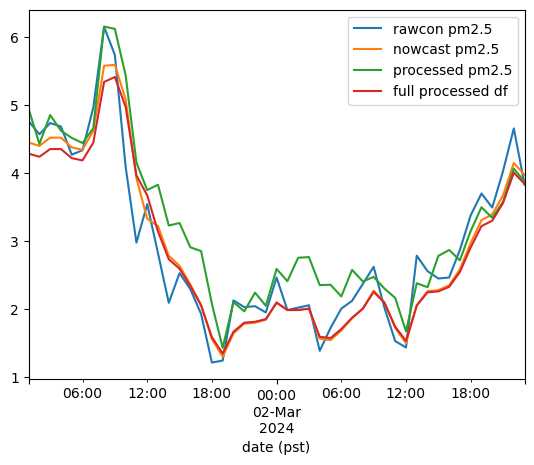

In [27]:
combined_df[date_range].plot(x='date (pst)', y=['rawcon pm2.5', 'nowcast pm2.5', 'processed pm2.5','full processed df'])
plt.show()

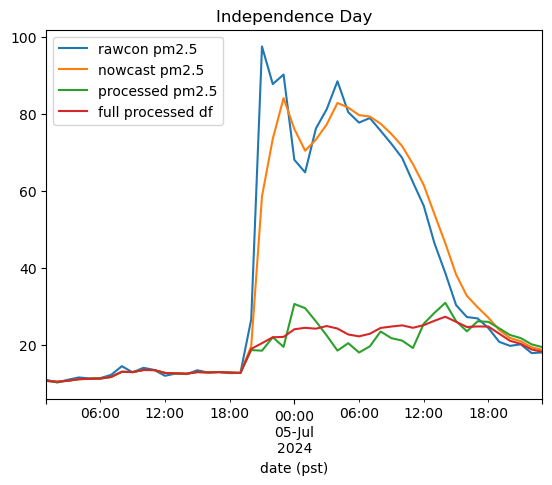

In [28]:
event, days_fwd = 'Independence Day 2024', 2
lo = dates_of_interest[event]
hi = dates_of_interest[event] + pd.Timedelta(days=days_fwd)
date_range = (combined_df['date (pst)'] > lo) & (combined_df['date (pst)'] < hi)

combined_df[date_range].plot(x='date (pst)', y=['rawcon pm2.5', 'nowcast pm2.5', 'processed pm2.5','full processed df'])
plt.title('Independence Day')
plt.show()

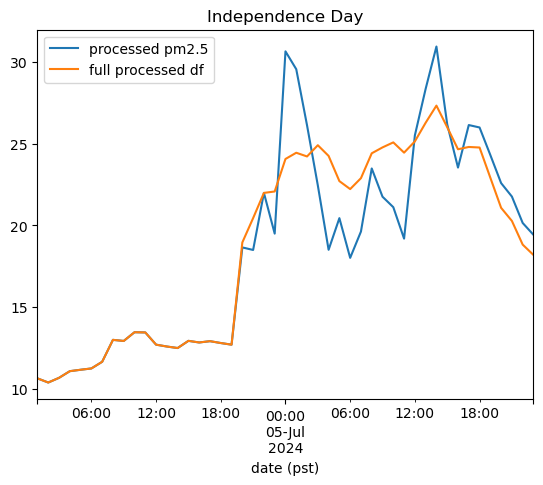

In [29]:
combined_df[date_range].plot(x='date (pst)', y=['processed pm2.5','full processed df'])
plt.title('Independence Day')
plt.show()

Recap:
1. Remove all sensors that report < 25% of the time
2. Replace all sensors reporting < 0 PM2.5 with NaN
3. Fill all non-reporting sensors with NaN Value
4. Replace outliers (zscore > 3 per sensor) with NaN
5. Impute NaNs with a forward and backward fill per sensor

Note: when I write "per sensor", it means that the actions are done based on the sensor itself; e.g. we replace outliers on a sensor based on the statistics of the sensor itself, not the other. In the same vein, we make sure to impute NaNs using a ffill/bfill on the individual sensor (and sorted by time) so that other sensors are not imputing other sensors!

<Axes: xlabel='date (pst)'>

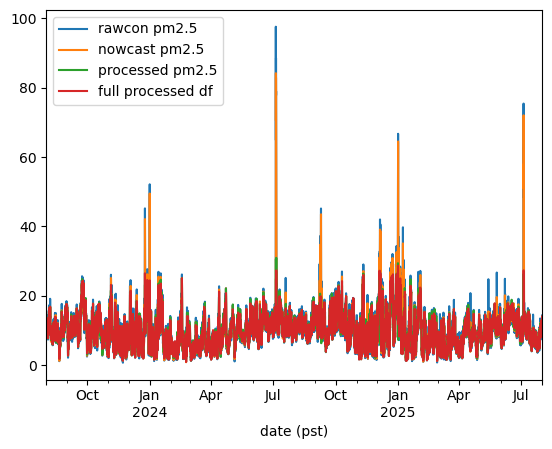

In [30]:
combined_df.plot(x='date (pst)', y=['rawcon pm2.5', 'nowcast pm2.5', 'processed pm2.5','full processed df'])

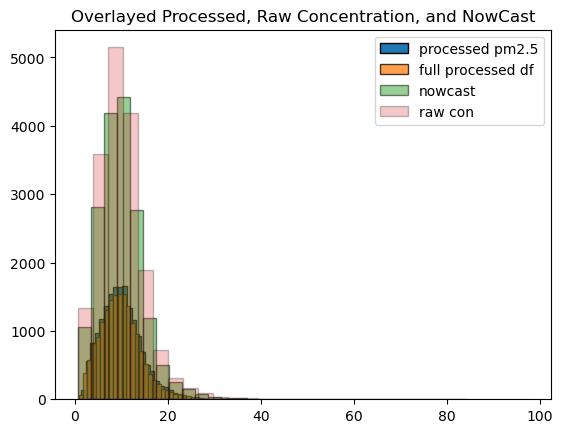

In [31]:
plt.title('Overlayed Processed, Raw Concentration, and NowCast')
plt.hist(combined_df['processed pm2.5'], bins=30, edgecolor='black', alpha=1, label='processed pm2.5')
plt.hist(combined_df['full processed df'], bins=30, edgecolor='black', alpha=0.75, label='full processed df')
plt.hist(combined_df['nowcast pm2.5'], bins=30, edgecolor='black', alpha=0.5, label='nowcast')
plt.hist(combined_df['rawcon pm2.5'], bins=30, edgecolor='black', alpha=0.25, label='raw con')
plt.legend(loc='upper right')
plt.show()

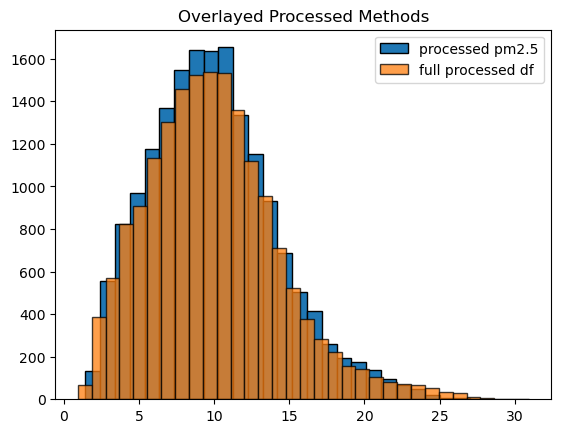

In [32]:
plt.title('Overlayed Processed Methods')
plt.hist(combined_df['processed pm2.5'], bins=30, edgecolor='black', alpha=1, label='processed pm2.5')
plt.hist(combined_df['full processed df'], bins=30, edgecolor='black', alpha=0.75, label='full processed df')
plt.legend(loc='upper right')
plt.show()